<a href="https://colab.research.google.com/github/bkarolina/DS-Projects-Springboard/blob/master/News_project_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()
import io
import pandas as pd
#news = pd.read_json(io.BytesIO(uploaded['News.json']), lines=True)
# Dataset is now stored in a Pandas Dataframe

In [0]:
news = pd.read_json('News.json', lines=True)

In [0]:
news.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [0]:
import string
translator = str.maketrans('', '', string.punctuation)
news.headline = news.headline.apply(lambda x: x.translate(translator))

In [0]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
authors              200853 non-null object
category             200853 non-null object
date                 200853 non-null datetime64[ns]
headline             200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [0]:
news.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199320,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://www.theda...,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


In [0]:
news.drop(columns=['date', 'link'], axis=1, inplace=True)
news.head()

,authors,category,headline,short_description
0,Melissa Jeltsen,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,Jim Carrey Blasts Castrato Adam Schiff And Dem...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [0]:
news.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [0]:
news.authors.unique()

array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [0]:
cats = news.groupby('category')
print("total categories:", cats.ngroups)
print(cats.size())

total categories: 41
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST 

In [0]:
# as shown above, THE WORLDPOST and WORLDPOST should be the same category, so merge them. (and ohers as well)
def category_cleaner(x):
    
    if x == 'THE WORLDPOST':
        return 'WORLDPOST'
    elif x == 'PARENTING':
        return 'PARENTS'
    elif x == 'ARTS' or x == 'CULTURE & ARTS':
        return 'ARTS & CULTURE'
    elif x == 'STYLE':
        return 'STYLE & BEAUTY'
    elif x == 'COLLEGE':
        return 'EDUCATION'
    elif x == 'TASTE':
        return 'FOOD & DRINK'
    else:
        return x
    
news['category'] = news.category.apply(category_cleaner)


In [0]:
cats = news.groupby('category')
print("total categories:", cats.ngroups)
print(cats.size())

total categories: 34
category
ARTS & CULTURE     3878
BLACK VOICES       4528
BUSINESS           5937
COMEDY             5175
CRIME              3405
DIVORCE            3426
EDUCATION          2148
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       8322
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTS           12632
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE & BEAUTY    11903
TECH               2082
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
dtype: int64


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]

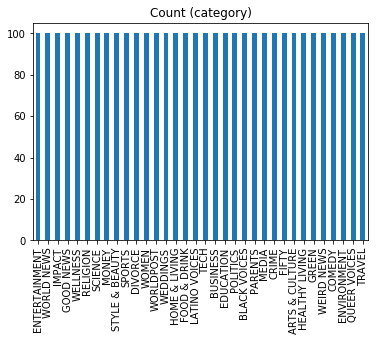

In [0]:
num_sample = 100 # number of samples we want to have
df0_list = []  # list of dataframe for each category
categories = news.category.unique() # list of categories

for cat in categories:
  df0 = news[news['category'] == cat]
  df_under0 = df0.sample(num_sample)
  df0_list.append(df_under0)

final_under = pd.concat(df0_list)
#print("Random under-sampling:")
#print(final_under.category.value_counts())
df = final_under
final_under.category.value_counts().plot(kind='bar', title='Count (category)')

In [0]:
df.describe()

,authors,category,headline,short_description
count,3400,3400,3400,3400
unique,1526,34,3393,3002
top,,ENTERTAINMENT,Animal Photos Of The Week,
freq,659,100,5,391


In [0]:
features = ['headline', 'short_description']
target = 'category'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train.head()

,headline,short_description
147830,Energy Prices Shock Hawaii Farmers Into Altern...,"HAMAKUA, BIG ISLAND — Lush green fields rise a..."
156420,Rihannas Topshop Lawsuit Demands 5 Million Ove...,"Rihanna is a big fan of Topshop, splurging on ..."
129207,6 Things Real People Learned From Having Reven...,By Danielle Page for YourTango.com Lesson #2: ...
168135,7 Weekday Breakfast Recipes,Breakfast may be the most important meal of th...
141157,Bamboo Treehouse In Bali Is Pretty Much A Mans...,As if Bali's beautiful seascape and tropical w...


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import TweetTokenizer

TweetTokenizer().tokenize # here I can change parameters of it
headline = Pipeline([
                ('selector', TextSelector(key='headline')),
                ('tfidf', TfidfVectorizer(ngram_range=(1, 2),tokenizer=TweetTokenizer().tokenize, max_df=0.9, stop_words='english')),
                ('TruncatedSVD', TruncatedSVD(n_components=1000))
            ])

In [0]:
description =  Pipeline([
                ('selector', TextSelector(key='short_description')),
                ('tfidf', TfidfVectorizer(ngram_range=(1, 2),tokenizer=TweetTokenizer().tokenize, max_df=0.9, stop_words='english')),
                ('TruncatedSVD', TruncatedSVD(n_components=1000))
            ])

In [0]:
from sklearn.pipeline import FeatureUnion
import time
start_time = time.time()

feats = FeatureUnion([('headline', headline), 
                      ('description', description)
                       ])

feature_processing = Pipeline([('feats', feats)])
X_train_tr = feature_processing.fit_transform(X_train)
X_test_tr = feature_processing.transform(X_test)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, class_weight='balanced', C=1.0)
logreg.fit(X_train_tr, y_train)
preds = logreg.predict(X_test_tr)

from sklearn.metrics import f1_score
print("macro:", f1_score(y_test, preds, average='macro'))
print("micro:", f1_score(y_test, preds, average='micro'))
print("I am done!")
print("--- %s seconds ---" % (time.time() - start_time))

macro: 0.3287453139785712
micro: 0.33088235294117646
I am done!
--- 81.71385192871094 seconds ---


In [0]:
start_time = time.time()
logreg = LogisticRegression(random_state=0, class_weight='balanced', C=1.0, solver='newton-cg')
logreg.fit(X_train_tr, y_train)
preds = logreg.predict(X_test_tr)
print("micro:", f1_score(y_test, preds, average='micro'))
print("I am done!")
print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

def updated_dict(d, **kwargs):
    updated_d = d.copy()
    updated_d.update(kwargs)
    return updated_d

def train_logreg(X_train_sc, y_train, **kwargs):
    clf = LogisticRegression(random_state=0, 
                             class_weight='balanced',
                             solver=kwargs.get('solver', 'sag'), # instead of defaults you can have {} which would rise exception
                             penalty=kwargs.get('penalty', 'l2'), 
                             C=kwargs.get('C', 1.0))
    model = clf.fit(X_train_sc, y_train)
    return model 

# return as pandas series, with multiple evaulation metrcis (fp, tn, fn, tp)
def eval_model(X_test_sc, y_test, X_train_sc, y_train):
    hp['f1_score'] = f1_score(y_test, model.predict(X_test_sc), average='micro', labels=np.unique(model.predict(X_test_sc)))
    hp['recall'] = recall_score(y_test, model.predict(X_test_sc), average='micro', labels=np.unique(model.predict(X_test_sc)))
    hp['precision'] = precision_score(y_test, model.predict(X_test_sc), average='micro', labels=np.unique(model.predict(X_test_sc)))
    return hp

scores = []
logreg_def_hyperpar = dict(train_function=train_logreg, solver='liblinear', penalty='l1', C=1.0)
logreg_hyperparameters = [logreg_def_hyperpar, updated_dict(logreg_def_hyperpar, C=0.5),
                         updated_dict(logreg_def_hyperpar, C=0.1),
                         #updated_dict(logreg_def_hyperpar,solver='sag', penalty='l2'),
                         #updated_dict(logreg_def_hyperpar, solver='sag', penalty='l2', C=0.5),
                         #updated_dict(logreg_def_hyperpar,solver='sag', penalty='l2', C=0.1),
                         updated_dict(logreg_def_hyperpar,solver='newton-cg', penalty='l2'),
                         updated_dict(logreg_def_hyperpar,solver='newton-cg', penalty='l2', C=0.5),
                         updated_dict(logreg_def_hyperpar, solver='newton-cg', penalty='l2', C=0.1),
                        # updated_dict(logreg_def_hyperpar,solver='lbfgs', penalty='l2'),  
                        # updated_dict(logreg_def_hyperpar,solver='lbfgs', penalty='l2', C=0.5),
                        # updated_dict(logreg_def_hyperpar,solver='lbfgs', penalty='l2', C=0.1)
                        ]


start_time = time.time()
for hyperparameters in logreg_hyperparameters:
    hp = logreg_def_hyperpar.copy()
    hp.update(hyperparameters)
    train = hp.get('train_function')
    print(hp)
    model = train(X_train_tr, y_train, **hp)
    hp = eval_model(X_test_tr, y_test, X_train_tr, y_train)
    scores.append(hp)
print("I am done!")
print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
def clean_func_names(df):
    df = df.copy()   
    columns = [c for c in df.columns if callable(df[c][0])] 
    for c in columns:
        funcs = []
        for train in df[c]:
            funcs.append(train.__name__)
        df[c] = funcs
    return df
  
result = clean_func_names(pd.DataFrame(scores))

In [0]:
result.to_csv('log_reg_100per sample.csv', index=False)